# EMB5016 - Cálculo Numérico  
## Lista de Exercícios 7 - Integração numérica

##### Elison Maiko Oliveira de Souza - 22102900

> **Questão 1**
>
> Implemente um método `Trapezio2D( f , a , b , c , d , m , n)`, que recebe:
>
> - Uma função $f=f(x,y)$ de duas variáveis.
> - Números reais $a<b$ e $c<d$.
> - Números inteiros positivos $m,n$.
>
> e retorna a aproximação da integral dupla de $f$ no quadrado $[a,b]\times [c,d]$:
> $$\int_a^b\int_c^d f(x,y)dydx$$
> utilizando uma variação do método do trapézio, conforme o seguinte procedimento:
> 1. Discretize o intervalo $[a,b]$ em $m+1$ pontos, pondo $x_i=a+i\dfrac{(b-a)}{m}$ para $i=0,1,\ldots,m$.
> 2. Similarmente, discretize o intervalo $[c,d]$ em $n+1$ pontos, pondo $y_j=a+i\dfrac{(d-c)}{n}$ para $i=0,1,\ldots,n$.
> 3. Dado um número $x$, defina $g(x)=\int_c^d f(x,y)dy$, de modo que $\int_a^b\int_c^d f(x,y)dydx=\int_a^b g(x)dx$.
> 4. Utilize a regra do trapézio com a discretização do intervalo $[a,b]$, para obter uma aproximação para $\int_a^b\int_c^d f(x,y)dydx$ em termos de $g(x_0)$, $g(x_1)$, $\ldots$, $g(x_m)$.
> 5. Para cada $i=0,1,\ldots,m$, utilize a regra do trapézio no intervalo $[c,d]$ discretizado acima para obter uma aproximação para $g(x_i)$ em termos de $f(x_i,y_0)$, $f(x_i,y_1)$, $\ldots$, $f(x_i,y_n)$.
> 6. Utilize a regra do trapézio no intervalo $[a,b]$ discretizado acima para obter uma aproximação de $\int_a^b g(x)dx$ em termosde $g(x_0)$, $g(x_1)$, $\ldots$, $g(x_m)$.

O que foi entendido:

Criar um código que calcule a integral dupla $\int_a^b\int_c^d f(x,y)dydx$

E segundo os tópicos é necessario criar uma função g(x) que calcula a integral de c a d $g(x)=\int_c^d f(x,y)dy$ e que terá x fixo e y variando em $f(x,yi)$ com i variando em $f(x,y0)$, $g(x,y1)$, $\ldots$, $f(x,yn)$.

E assim calcular a integral dupla, mas por meio de $\int_a^b g(x)dx$

In [1]:
def Trapezio2D(f,a,b,c,d,m,n):

    # Numero de subintervalos
    nInter_x = abs((b-a)/m)             
    nInter_y = abs((c-d)/n)

    #discretizando os intervalos 
    intervaloAB = [(a+i*nInter_x) for i in range(m+1)]     # ENUNCIADO 1
    IntervaloCD = [(c+j*nInter_y) for j in range(n+1)]     # ENUNCIADO 2 

    #Inicializa a Integral com 0
    integral =0.0 
    
    def g(xi):                                             #ENUNCIADO 3 
        soma = 0.0
        for y in IntervaloCD:       
           soma+= f(xi,y)                                  #ENUNCIADO 5 Aplica F(x0,yi) para i variando no Itervalo CD
        return soma*nInter_y                                

    for xi in intervaloAB:
        integral+=g(xi)                                    #ENUNCIADO 4 e 6

    return integral*nInter_x

In [18]:
def f(x,y):
    return 2*x+2*y

print("Resultado esperado: 32.00")
print ("Resultado esperado:",Trapezio2D(f, 1,3, 1, 3, 1000, 1000))



Resultado esperado: 32.00
Resultado esperado: 32.064032


> **Questão 2**
>
> Implemente um método `Simpson2D( f , a , b , c , d , m , n)`, que tem os mesmos parâmetros que a função da questão anterior, e também retorna uma aproximação para a integral
> $$\int_a^b\int_c^d f(x,y)dydx,$$
> porém utilizando o método de Simpson tanto na integral interna quanto na externa.

In [4]:
def Simpson2D(f,a,b,c,d,m,n):

    # Numero de subintervalos
    nInter_x = abs((b-a)/m)            
    nInter_y = abs((d-c)/n)

    #discretizando os intervalos 
    intervaloAB = [(a+i*nInter_x) for i in range(m+1)]   
    IntervaloCD = [(c+j*nInter_y) for j in range(n+1)]    

    def g(xi):                                             
        j = 0
        Integral = 0.0
        for y in IntervaloCD:  

            if j%2 == 0:                #Somatório com base no índice
                Integral += 2*f(xi,y)
            else:
                Integral += 4*f(xi,y)

            j+=1

        Integral += f(xi,c) + f(xi,d)      #Somando os valores nos limites de integração
        Integral *= nInter_y/3

        return Integral
        
    
    i = 0
    integral= 0.0

    for xi in intervaloAB:

        if i%2 == 0:                # Somatório com base no índice
            integral += 2*g(xi)          # 2 x Índices pares
        else:
            integral += 4*g(xi)          # 4 x Índices Ímpraes
        i+=1

    integral += g(a)+g(b)              #Somando os valores nos limites de integração
    integral *= nInter_x/3
    
    return integral

In [21]:
print ("Output obtido:",Simpson2D(f, 1,3, 1, 3, 1000, 1000))


Output obtido: 32.08539022222223


> **Questão 3**
>
> Implemente um método `Gauss2D( f , a , b , c , d , m , n)`, que tem os mesmos parâmetros que a função da questão anterior, e também retorna uma aproximação para a integral
> $$\int_a^b\int_c^d f(x,y)dydx.$$
> Porém, essa função deve utilizar um método de quadratura Gaussiana com $m$ nós no cálculo da integral externa (no intervalo $[a,b]$), e um método de quadratura Gaussiana com $n$ nós no cálculo das integrais internas (no intervalo $[c,d]$). Assuma que $m,n\leq 5$.

In [22]:
from scipy.special import roots_legendre

def Gauss2D(f,a,b,c,d,m,n):
    Mnodes, Mweights = roots_legendre(m)
    Nnodes, Nweights = roots_legendre(n)
    # Numero de subintervalos
    nInter_x = abs((b-a)/2)            
    nInter_y = abs((d-c)/2)

    #discretizando os intervalos 
    intervaloAB = [((a+b)/2 + Mnodes[i]*nInter_x) for i in range(m)]   
    IntervaloCD = [((c+d)/2 + Nnodes[j]*nInter_y) for j in range(n)]    

    def g(xi):                                             
        j=0
        Integral = 0.0
        for y in IntervaloCD:  
            Integral+= Nweights[j] * f(xi,y) 
            j+=1       

        Integral *= nInter_y
        return Integral
        
    i = 0
    integral= 0.0
    for xi in intervaloAB:
        integral += Mweights[i] * g(xi)
        i+=1
        
    integral *= nInter_x
    
    return integral

In [24]:
print ("Output obtido:",Gauss2D(f,1,3,1,3,5,5))

Output obtido: 31.999999999999993


> **Questão 4**
>
> Sejam $P_1$, $P_2$ e $P_3$ vértices de um triângulo no plano $xy$ (visto dentro do espaço tridimensional). Considere três pontos acima desse triângulo, dados em coordenadas como $Q_1=(P_1,z_1)$, $Q_2=(P_2,z_2)$ e $Q_3=(P_3,z_3)$.
>
> Encontre um modo de calcular o volume do poliedro (convexo) cujos vértices são os pontos $P_1,P_2,P_3,Q_1,Q_2,Q_3$. Implemente essa fórmula numa função `integralTriangulo( P1 , P2 , P3 , z1 , z2 , z3 )`; Cada ponto $P_i$ é dado como uma lista $P_i = [x_i,y_i]$.

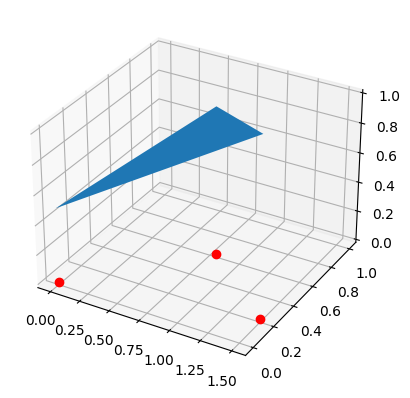

In [10]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

P =  np.array([
    [[0,0,0.5],[1.5,0.2,1.2],[0.8,0.6,1.0]]
])

ax.add_collection(Poly3DCollection(P))

ax.plot(P[0,:,0],P[0,:,1],np.zeros(3),'or')

plt.show()

In [11]:
def integralTriangulo(P1, P2, P3, z1, z2, z3):

    # Cálculo do volume do poliedro como a soma dos volumes dos tetraedros
    volume = 0

    volume += volumeTetraedro(P1, P2, P3, z1)
    volume += volumeTetraedro(P1, P2, P3, z2)
    volume += volumeTetraedro(P1, P2, P3, z3)

    return volume

def volumeTetraedro(P1, P2, P3, z):
    # Cálculo do volume de um tetraedro utilizando a fórmula de determinantes
    v1 = [P2[0] - P1[0], P2[1] - P1[1]]
    v2 = [P3[0] - P1[0], P3[1] - P1[1]]

    volume = abs(v1[0] * v2[1] - v1[1] * v2[0]) * z / 6

    return volume



# Exemplo dado acima:
P1 = [0, 0]
P2 = [1.5, 0.2]
P3 = [0.8, 0.6]
z1 = 0.5
z2 = 1.2
z3 = 1.0

resultado = integralTriangulo(P1, P2, P3, z1, z2, z3)
print("O volume do poliedro é:", resultado)


O volume do poliedro é: 0.3329999999999999
